In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv("distributed_system_architecture_stress_dataset.csv")
#print(df.head(n=2))
print(df.shape)
print(df.dtypes)


(200000, 21)
architecture_type                   str
deployment_type                     str
communication_type                  str
num_services                      int64
num_databases                     int64
requests_per_second             float64
avg_payload_kb                  float64
read_write_ratio                float64
peak_traffic_multiplier         float64
cpu_utilization_percent         float64
memory_utilization_percent      float64
network_latency_ms              float64
packet_loss_percent             float64
avg_latency_ms                  float64
p95_latency_ms                  float64
error_rate_percent              float64
db_connection_pool_exhausted      int64
retry_storm_detected              int64
circuit_breaker_open              int64
system_state                        str
root_cause                          str
dtype: object


In [18]:
df.describe()

,num_services,num_databases,requests_per_second,avg_payload_kb,read_write_ratio,peak_traffic_multiplier,cpu_utilization_percent,memory_utilization_percent,network_latency_ms,packet_loss_percent,avg_latency_ms,p95_latency_ms,error_rate_percent,db_connection_pool_exhausted,retry_storm_detected,circuit_breaker_open
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,26.137910,1.438170,189.328496,75.731542,0.675427,2.495771,15.867175,60.465416,30.084673,0.417323,216.183698,356.641938,1.660528,0.001010,0.006055,0.004760
std,18.480709,0.798029,150.018147,42.747464,0.158717,0.865520,13.034747,32.410488,29.950179,0.445572,115.909024,201.600465,2.737905,0.031765,0.077578,0.068829
min,1.000000,1.000000,6.620000,2.000000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000,40.350000,53.120000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,92.300000,38.690000,0.540000,1.750000,7.210000,32.290000,8.710000,0.000000,141.840000,226.150000,0.380000,0.000000,0.000000,0.000000
50%,25.000000,1.000000,148.310000,75.500000,0.680000,2.490000,13.120000,62.960000,20.940000,0.300000,187.500000,306.975000,1.150000,0.000000,0.000000,0.000000
75%,42.000000,2.000000,238.090000,112.780000,0.810000,3.242500,21.050000,93.950000,41.822500,0.700000,255.790000,426.980000,2.190000,0.000000,0.000000,0.000000
max,59.000000,4.000000,3199.840000,150.000000,0.950000,4.000000,100.000000,100.000000,398.810000,2.960000,1540.750000,3120.980000,49.220000,1.000000,1.000000,1.000000


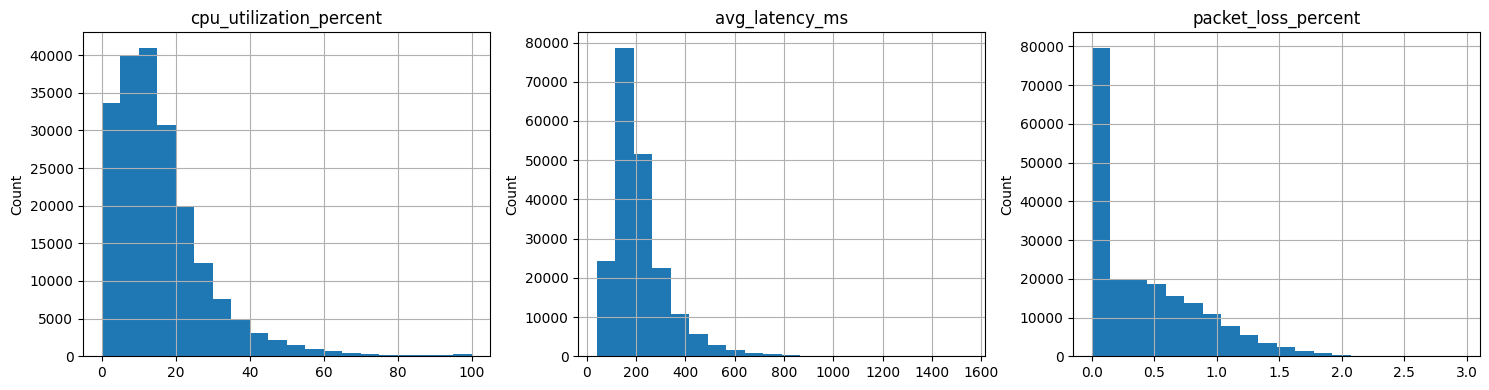

In [19]:
cols = ["cpu_utilization_percent", "avg_latency_ms", "packet_loss_percent"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

for ax, col in zip(axes, cols):
    df[col].hist(bins=20, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

Looking at these graphs, it seems that the variables associated with networks have a right skewed distribution. This makes sense because this is typically what you see in these systems, where the majority of values like latency and payload size are small, but exceptional cases cause high outliers.

<Axes: >

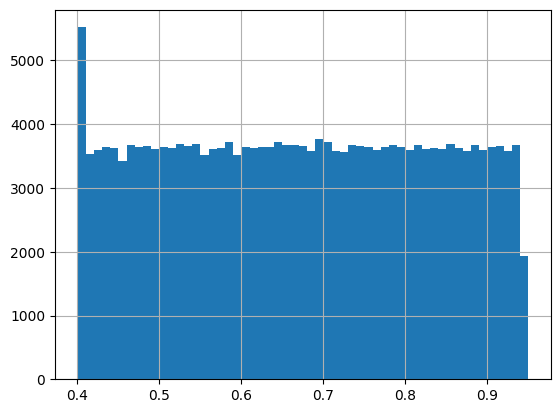

In [20]:
min_val = df.read_write_ratio.min()
max_val = df.read_write_ratio.max()
bins = np.arange(min_val, max_val + 0.01, 0.01)
df.read_write_ratio.hist(bins=bins) # each bin is 0.01

In [21]:
unique_values = np.sort(df.read_write_ratio.unique())
print(unique_values)

[0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53
 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67
 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81
 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95]


<Axes: >

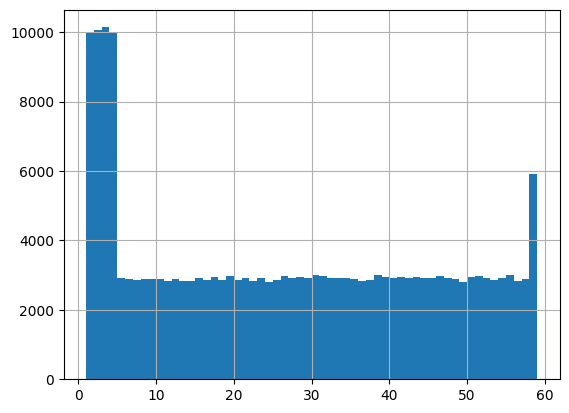

In [22]:
min_val = df.num_services.min()
max_val = df.num_services.max()
bins = np.arange(min_val, max_val + 1, 1)
df.num_services.hist(bins=bins) 

<Axes: >

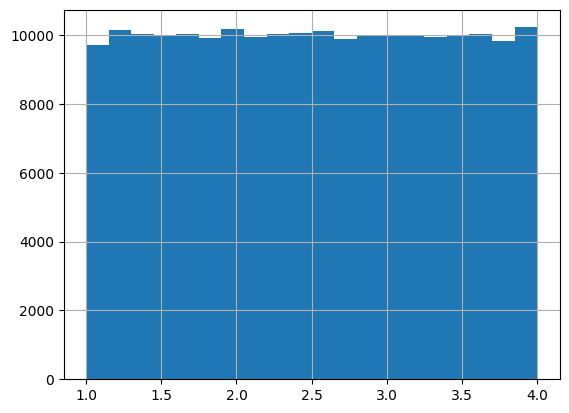

In [23]:
df.peak_traffic_multiplier.hist(bins=20) 

In [24]:
counts, bin_edges = np.histogram(df.peak_traffic_multiplier, bins=bins)
max_idx = np.argmax(counts)
most_common_bin = (bin_edges[max_idx], bin_edges[max_idx + 1])
most_common_bin_count = counts[max_idx]

print("Most frequent bin:", most_common_bin)
print("Count in that bin:", most_common_bin_count)

Most frequent bin: (np.int64(2), np.int64(3))
Count in that bin: 66667


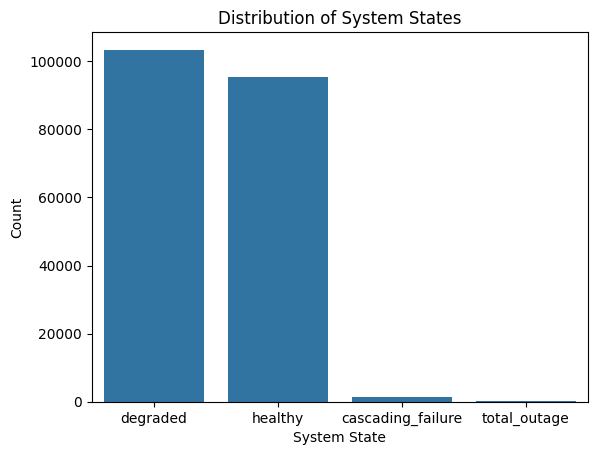

In [25]:
sns.countplot(data=df, x="system_state", order=df["system_state"].value_counts().index)
plt.xlabel("System State")
plt.ylabel("Count")
plt.title("Distribution of System States")
plt.show()

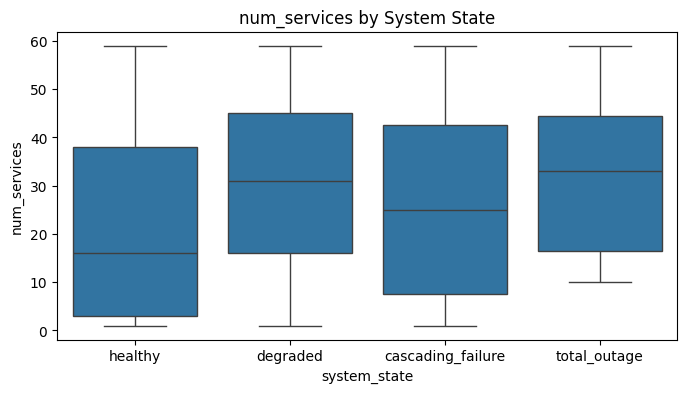

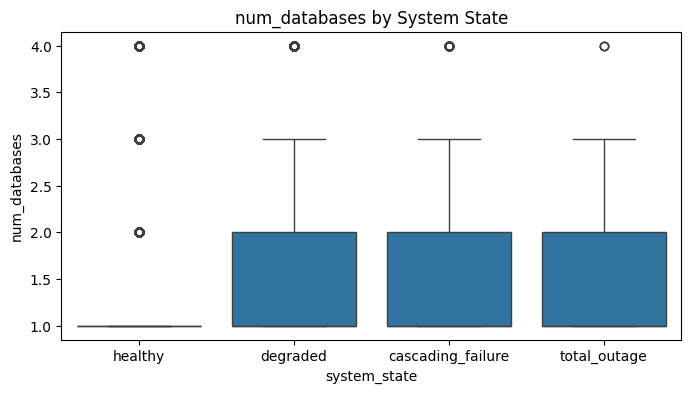

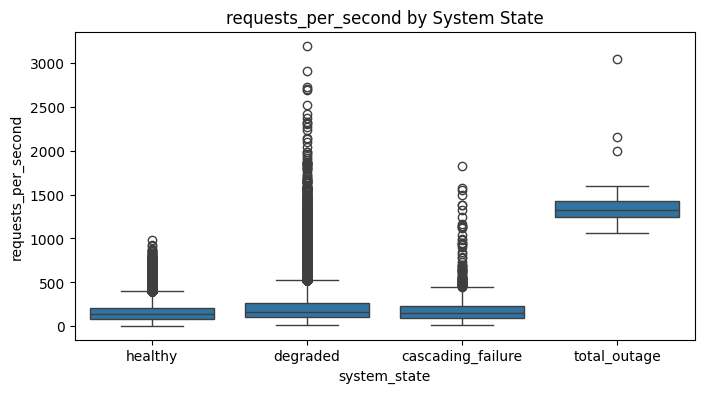

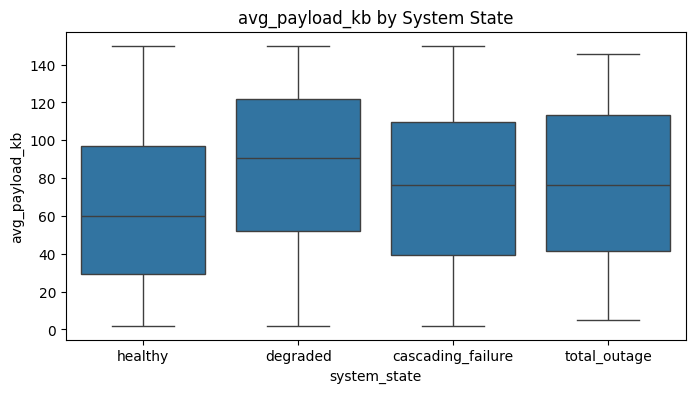

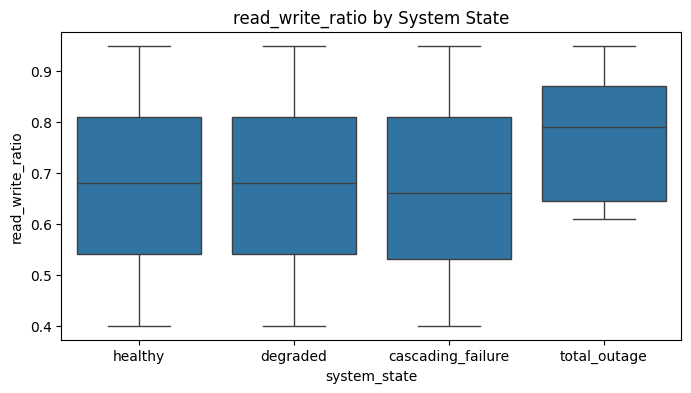

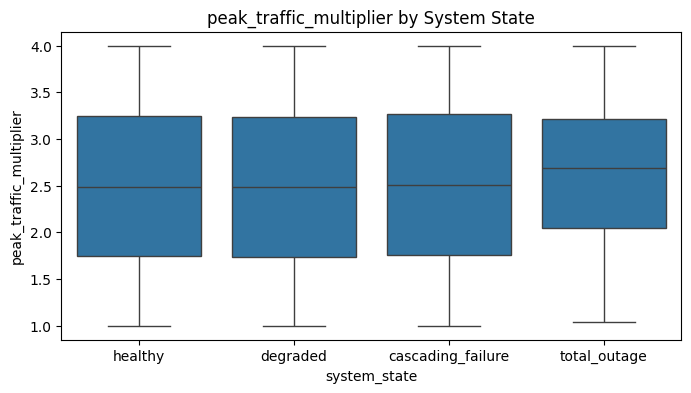

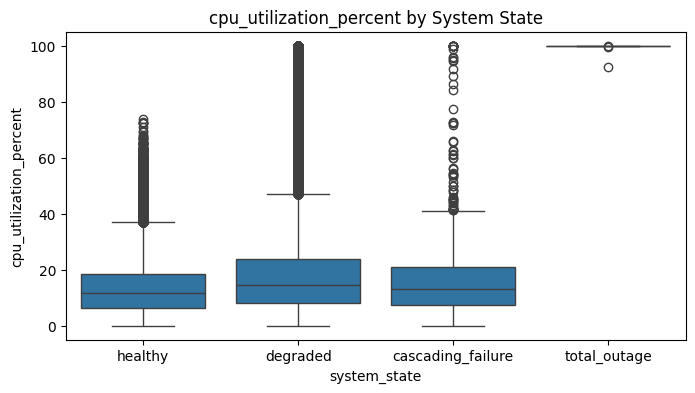

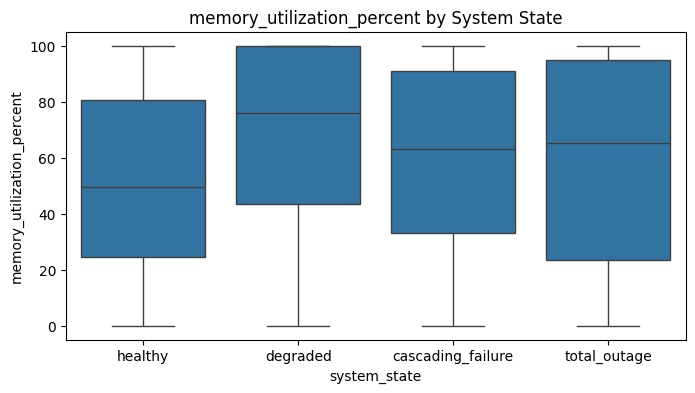

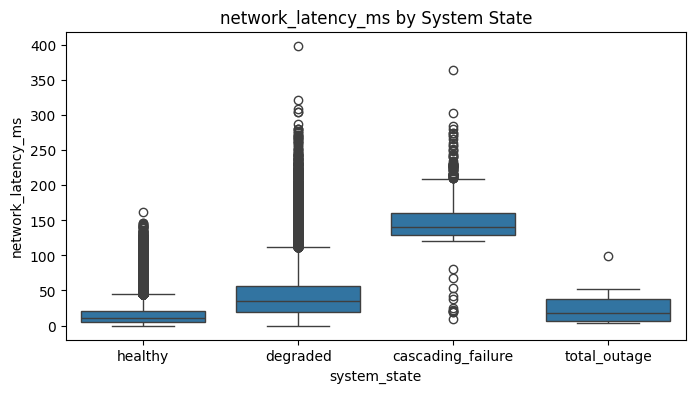

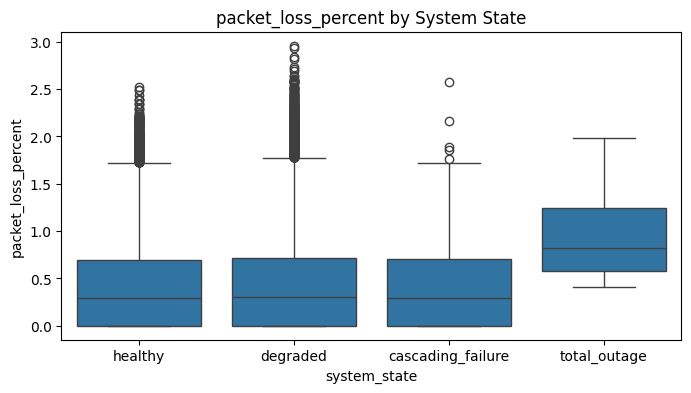

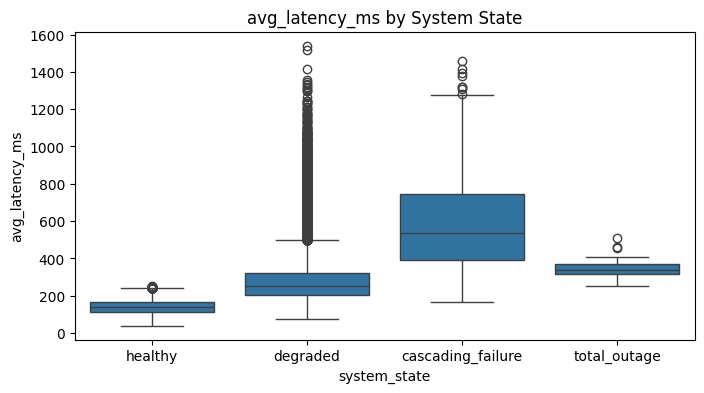

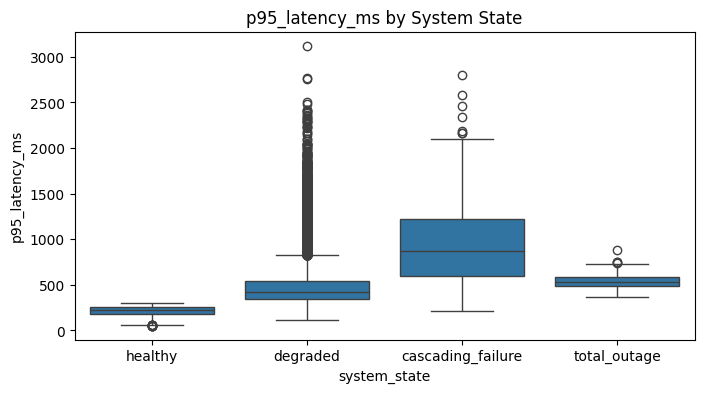

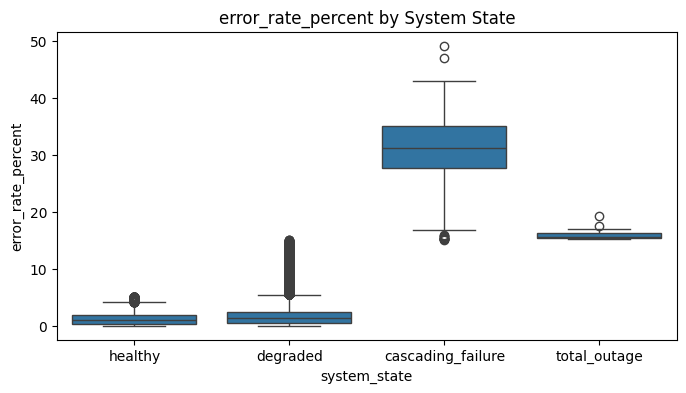

In [26]:
numeric_cols = [
    "num_services", "num_databases", "requests_per_second", "avg_payload_kb",
    "read_write_ratio", "peak_traffic_multiplier", "cpu_utilization_percent",
    "memory_utilization_percent", "network_latency_ms", "packet_loss_percent",
    "avg_latency_ms", "p95_latency_ms", "error_rate_percent"
]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="system_state", y=col)
    plt.title(f"{col} by System State")
    plt.show()

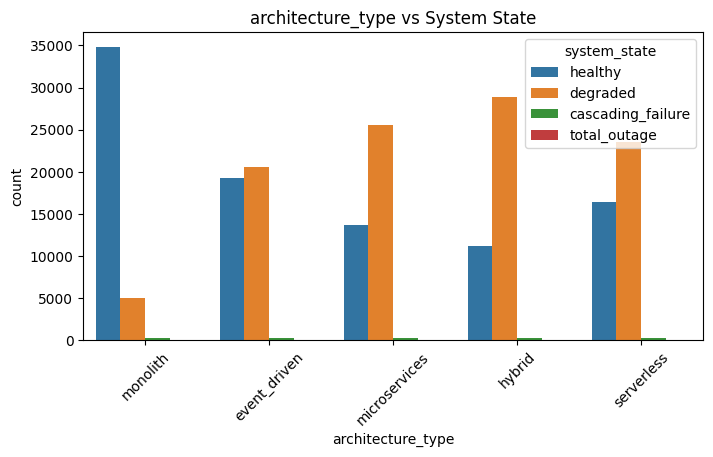

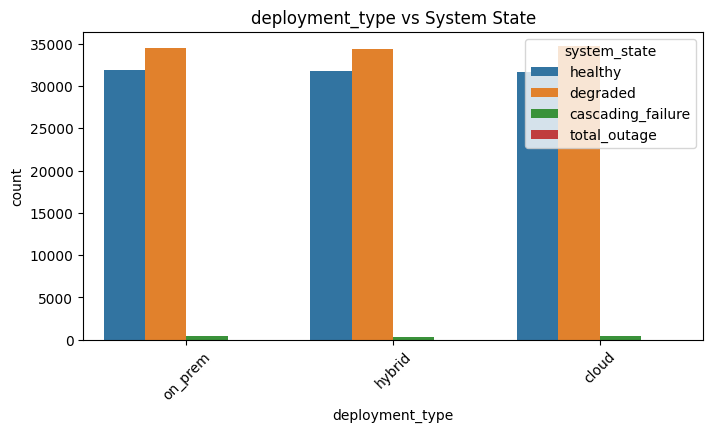

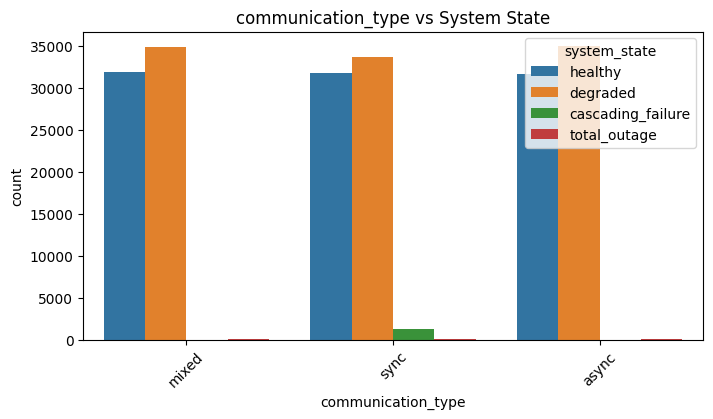

In [27]:
categorical_cols = ["architecture_type", "deployment_type", "communication_type"]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="system_state")
    plt.title(f"{col} vs System State")
    plt.xticks(rotation=45)
    plt.show()

In [28]:
numeric_df = df.select_dtypes(include="number")
numeric_df = numeric_df.drop(
    columns=[
        "circuit_breaker_open",
        "retry_storm_detected",
        "db_connection_pool_exhausted",
        "network_latency_ms"
    ]
)
corr_matrix = numeric_df.corr()

print(corr_matrix)

                            num_services  num_databases  requests_per_second  \
num_services                    1.000000       0.645006             0.003058   
num_databases                   0.645006       1.000000             0.004677   
requests_per_second             0.003058       0.004677             1.000000   
avg_payload_kb                  0.003448       0.000158             0.000234   
read_write_ratio                0.001434       0.000280             0.001042   
peak_traffic_multiplier        -0.004085      -0.002089             0.001253   
cpu_utilization_percent         0.002453       0.003711             0.923872   
memory_utilization_percent      0.003667       0.000218             0.000093   
packet_loss_percent            -0.000150      -0.001124            -0.003665   
avg_latency_ms                  0.243269       0.107228             0.141794   
p95_latency_ms                  0.230972       0.101956             0.133449   
error_rate_percent              0.045828

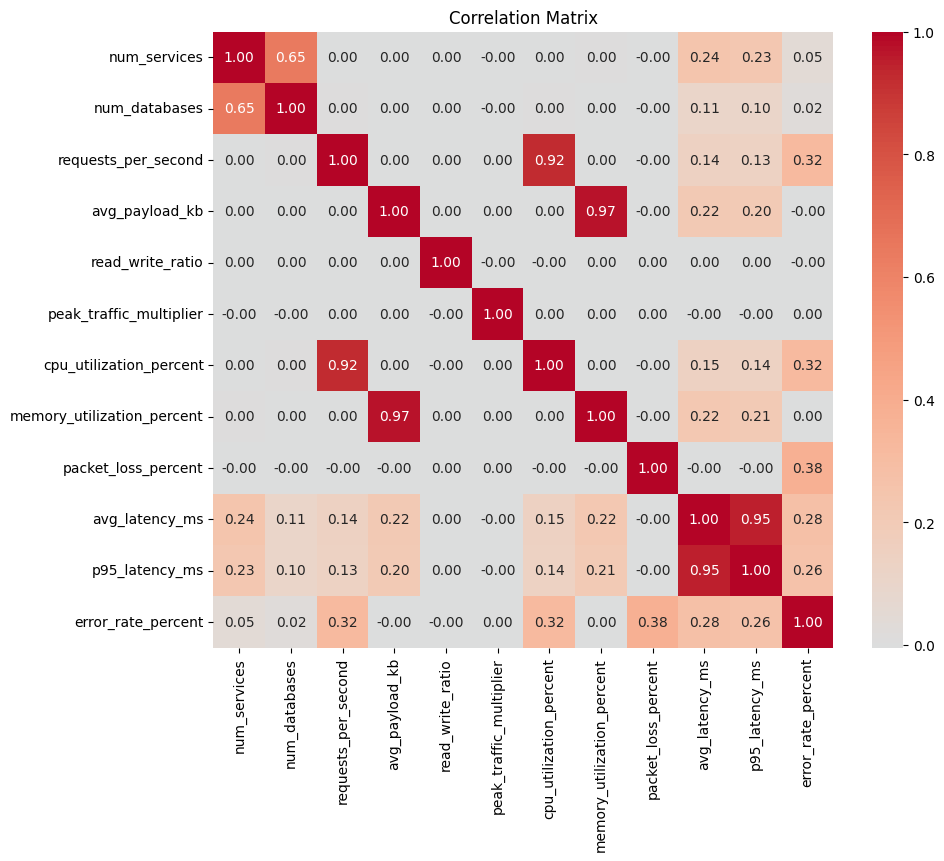

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

The correlations all look reasonable, and it makes sense why they are correlated. Interesting that the read-write ratio doesn't correlate with anything.